# This is the original notebook with lots of redundant code

### Downloaded subtitle files from OpenSubtitles

Downloaded all data from here:
``` https://www.opensubtitles.org/en/ssearch/sublanguageid-all/idmovie-484229```

Used script to extract text from srt files from OpenSubtitles files:

```https://gist.github.com/ndunn219/62263ce1fb59fda08656be7369ce329b```

In [1]:
import nltk
import os, os.path
import pandas as pd
import glob
import re
import numpy as np

# import python module to clean transcripts
from subtitle_lib.srt_formatting import *

In [2]:
# make list of full directory path names for each season

path = os.getcwd() + '/puk_data/'
dirs = os.listdir(path)
dirs.remove('.DS_Store')

full_dirs = []
for file in dirs:
    full_dir = path + file
    full_dirs.append(full_dir)

In [3]:
# make list of full episode path names for each episode of each season

episode_files = []
for file in full_dirs:
    contents = (glob.glob('{}/*'.format(file)))
    for episode in contents[:(len(contents))]:
        episode_srt = (glob.glob('{}/*'.format(episode)))
        episode_files.append(episode_srt[0])

In [4]:
# function to call cleaning scripts (from subtitle_lib.srt module) and write cleaned file as txt

def clean_save_file(file_name):
    with open(file_name, encoding='utf-8', errors='replace') as f:
        lines = f.readlines()
        new_lines = clean_up(lines)
        new_file_name = 'processed_text/' + file_name[-28:-22] + '.txt'
        #print(new_file_name)
        with open(new_file_name, 'w') as f:
            for line in new_lines:
                f.write(line)

In [ ]:
# call cleaning function on each episode, save to file

for episode in episode_files:
    clean_save_file(episode)

## Opening and tokenizing files

I'm new to NLP, so I'm going to try two different approaches for tokenizing my files. I'll use NLTK as well as SpaCy.

In [ ]:
f = open('processed_text/S01E01.txt', 'rU')
raw = f.read()

In [ ]:
# tokenize with NLTK and create an NLTK text

tokens = nltk.word_tokenize(raw)
sent_tokens = nltk.sent_tokenize(raw)
text = nltk.Text(tokens)

In [ ]:
# examine tokenization of first sentance

print('Original sentance')
print(sent_tokens[0], '\n')
print('Tokenization of words in sentance using default nltk tokenizer')
print(tokens[0:10])

In [ ]:
# make all words lower case and define vocab
words = [w.lower() for w in text]

vocab = sorted(set(words))

In [ ]:
# establish frequency distribution

fdist = nltk.FreqDist(words)
fdist.most_common(10)

### Here I'm going to follow along with the K2 NLP Project

In [7]:
# make list of full directory path names for each season

path = os.getcwd() + '/processed_text/'
files = os.listdir(path)
files.remove('.DS_Store') 
files.remove( '.480p..txt') # not sure what this file is, doesn't appear in file browser, removed
files.remove( '.S06E0.txt') # ditto

full_file_paths = [path + f for f in files] # create full file paths

In [26]:
test = (re.search(r'[ \w-]+?(?=\.)',full_file_paths[0]))[0]

In [27]:
test

'S05E02'

In [12]:
full_file_paths[0]

'/Users/jeff/Desktop/K2_DataScience/K2_NLP_project/processed_text/S05E02.txt'

In [29]:
# get subtitle text from each episode file
reviews = pd.DataFrame()
episode_list = []
for f in full_file_paths:
    file = open(f, 'rU')
    episode_text = file.read()
    episode_name = (re.search(r'[ \w-]+?(?=\.)',f))[0]
    episode_info = (episode_name, episode_text)
    episode_list.append(episode_info)

/Users/jeff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 'U' mode is deprecated


In [32]:
# append subtitle data to df
reviews = pd.DataFrame.from_records(episode_list)
reviews.columns=['episodeID', 'subtitle_text']

In [140]:
# read in csv with episode location information
episode_locations = pd.DataFrame.from_csv('puk_episode_list.csv',  index_col=None)

In [155]:
# merge location names into reviews df
reviews = reviews.merge(episode_locations, on='episodeID', how='left')
reviews = reviews[['episode_location','episodeID', 'subtitle_text']]

In [228]:
test = reviews.subtitle_text[reviews.index == 5]
type(test[5])

str

In [160]:
# print a sample review
sample_review_full = reviews.iloc[0]
sample_review = sample_review_full.subtitle_text[0:300]

In [161]:
import re
import string

# string.punctuation is simply a string of all special characters
translator = str.maketrans(string.punctuation, ' '*32)
print('All english punctuation strings: %s' % string.punctuation)

All english punctuation strings: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [162]:
# Testing tokenization on sample review
print(sample_review,'\n')

# tokenize and print tokens from the sample review
sample_tokens = nltk.word_tokenize(sample_review)
print(sample_tokens,'\n')

# Highlight Punctuations using regex to detect punctuation chars in the text
punkt_pattern = re.compile('['+string.punctuation+']')  # create regex pattern obj

# print a set of detected punctuation chars
sample_punkt = [p.group(0) for token in sample_tokens for p in [punkt_pattern.search(token)] if p]
print("Punctuation in review: %s" % set(sample_punkt))

Miami sneaks up on you.
Or do we change and find ourselves sneaking up, washing up, ending up in Miami?
♪ I took a walk through this beautiful world ♪
♪ felt the cool rain on my shoulder ♪
♪ found something good in this beautiful world ♪
♪ I felt the rain getting colder ♪
♪ sha, la, la, la, la, la,
 

['Miami', 'sneaks', 'up', 'on', 'you', '.', 'Or', 'do', 'we', 'change', 'and', 'find', 'ourselves', 'sneaking', 'up', ',', 'washing', 'up', ',', 'ending', 'up', 'in', 'Miami', '?', '♪', 'I', 'took', 'a', 'walk', 'through', 'this', 'beautiful', 'world', '♪', '♪', 'felt', 'the', 'cool', 'rain', 'on', 'my', 'shoulder', '♪', '♪', 'found', 'something', 'good', 'in', 'this', 'beautiful', 'world', '♪', '♪', 'I', 'felt', 'the', 'rain', 'getting', 'colder', '♪', '♪', 'sha', ',', 'la', ',', 'la', ',', 'la', ',', 'la', ',', 'la', ','] 

Punctuation in review: {'?', ',', '.'}


In [163]:
#Various Tokenizers
from nltk.tokenize import TreebankWordTokenizer, WordPunctTokenizer, WhitespaceTokenizer

sample_text = sample_review

sample_treebank_ = TreebankWordTokenizer().tokenize(sample_text)
sample_wordpunct_ = WordPunctTokenizer().tokenize(sample_text)
sample_wspace_ = WhitespaceTokenizer().tokenize(sample_text)
# NLTK Recommended: word_tokenize == Treebank for most cases
sample_word_ = nltk.word_tokenize(sample_text)

print(sample_treebank_)
print('Treebank Tokenizer found %d tokens\n' % len(sample_treebank_))

print(sample_wordpunct_)
print('WordPunct Tokenizer found %d tokens\n' % len(sample_wordpunct_))

print(sample_wspace_)
print('Whitespace Tokenizer found %d tokens\n' % len(sample_wspace_))

print(sample_word_)
print('nltk.word_tokenize Tokenizer found %d tokens\n' % len(sample_word_))

['Miami', 'sneaks', 'up', 'on', 'you.', 'Or', 'do', 'we', 'change', 'and', 'find', 'ourselves', 'sneaking', 'up', ',', 'washing', 'up', ',', 'ending', 'up', 'in', 'Miami', '?', '♪', 'I', 'took', 'a', 'walk', 'through', 'this', 'beautiful', 'world', '♪', '♪', 'felt', 'the', 'cool', 'rain', 'on', 'my', 'shoulder', '♪', '♪', 'found', 'something', 'good', 'in', 'this', 'beautiful', 'world', '♪', '♪', 'I', 'felt', 'the', 'rain', 'getting', 'colder', '♪', '♪', 'sha', ',', 'la', ',', 'la', ',', 'la', ',', 'la', ',', 'la', ',']
Treebank Tokenizer found 72 tokens

['Miami', 'sneaks', 'up', 'on', 'you', '.', 'Or', 'do', 'we', 'change', 'and', 'find', 'ourselves', 'sneaking', 'up', ',', 'washing', 'up', ',', 'ending', 'up', 'in', 'Miami', '?', '♪', 'I', 'took', 'a', 'walk', 'through', 'this', 'beautiful', 'world', '♪', '♪', 'felt', 'the', 'cool', 'rain', 'on', 'my', 'shoulder', '♪', '♪', 'found', 'something', 'good', 'in', 'this', 'beautiful', 'world', '♪', '♪', 'I', 'felt', 'the', 'rain', 'getti

In [57]:
from nltk.stem.porter import PorterStemmer
from numba import jit
st = PorterStemmer()

@jit
def stemmer():
    r_vocab = {}
    global_vocab = {}

    for idx, review in reviews.iterrows():
        for token in nltk.word_tokenize(review.subtitle_text.translate(translator)):
            stemmed_token = st.stem(token.lower())
            if stemmed_token in global_vocab:
                global_vocab[stemmed_token].append(review.episodeID)
            else:
                global_vocab[stemmed_token] = [review.episodeID]
            if review.episodeID in r_vocab:
                r_vocab[review.episodeID].append(stemmed_token)
            else:
                r_vocab[review.episodeID] = [stemmed_token]
    return r_vocab, global_vocab

In [58]:
r_vocab, global_vocab = stemmer()

In [60]:
print('The episodes utilize a vocabulary rich of %d words' % len(global_vocab.keys()))

The episodes utilize a vocabulary rich of 13707 words


In [127]:
# create a dict with every word as keys and their counts as values
def wordCount(vocabulary):
    wordCounts = {}
    for word in vocabulary:
        wordCounts[word] = len(vocabulary[word])
    return wordCounts

In [128]:
# let's plot some wordcounts
wordCounts = wordCount(global_vocab)
wordCounts_DF = pd.DataFrame.from_dict(wordCounts, orient='index')
wordCounts_DF.columns = ['Count']
wordCounts_DF = wordCounts_DF.sort_values('Count', ascending=False)
wordCounts_DF.head()

,Count
the,16704
i,11455
a,9897
and,9412
of,8473


In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("ggplot")

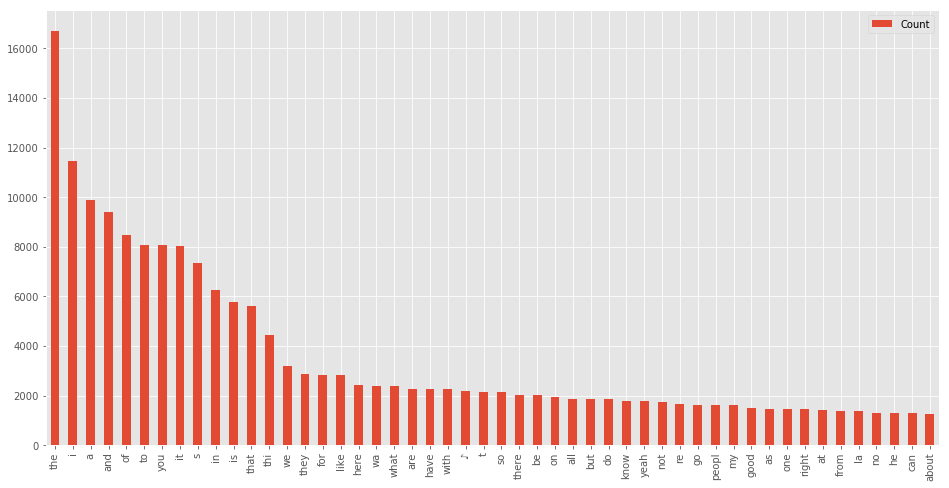

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(16,8))
wordCounts_DF[0:50].plot.bar(ax=ax)

### TF-IDF

In [165]:
r_vocab.keys()

dict_keys(['S05E02', 'S09E02', 'S09E03', 'S05E03', 'S05E01', 'S02E08', 'S10E08', 'S09E01', 'S07E04', 'S05E04', 'S07E01', 'S09E04', 'S09E05', 'S05E05', 'S05E07', 'S07E02', 'S09E07', 'S09E06', 'S05E06', 'S08E09', 'S01E05', 'S03E01', 'S04E08', 'S01E04', 'S11E01', 'S11E03', 'S01E06', 'S03E03', 'S03E02', 'S01E07', 'S11E02', 'S11E06', 'S01E03', 'S03E06', 'S03E07', 'S01E02', 'S11E07', 'S11E05', 'S03E05', 'S03E04', 'S01E01', 'S06E08', 'S11E04', 'S06E05', 'S04E01', 'S03E08', 'S08E01', 'S06E04', 'S11E08', 'S06E06', 'S08E03', 'S04E03', 'S04E02', 'S08E02', 'S06E07', 'S06E03', 'S04E06', 'S04E07', 'S08E07', 'S08E05', 'S04E05', 'S04E04', 'S01E08', 'S08E04', 'S02E02', 'S10E02', 'S10E03', 'S02E03', 'S02E01', 'S05E08', 'S10E01', 'S09E08', 'S02E04', 'S10E04', 'S10E05', 'S02E05', 'S02E07', 'S10E07', 'S10E06', 'S02E06'])

In [175]:
# create a dict of tf-idf for a sample review

test_tfidf = {}

# compute tf-idf and update dict
for token in r_vocab['S01E01']:
    if not token in test_tfidf:
        tf = np.log(1.*r_vocab['S01E01'].count(token)) + 1.
        idf = np.log(1. + len(reviews)*1. / len(set(global_vocab[token])) )
        test_tfidf[token] = tf * idf

#for token in test_tfidf:
#    print("%s : %f" % (token, test_tfidf[token]))
    
# sort the results decending by value
sorted_tfidf = sorted(test_tfidf.items(), key=lambda x: -x[1])

# print out results
for (k, v) in sorted_tfidf:
    print("%s : %f" % (k, v))

myanmar : 17.096041
yangon : 15.665989
bagan : 12.945652
burmes : 11.467042
noisi : 10.486449
burma : 9.269279
thiha : 9.222245
unintel : 9.222245
rhakin : 9.222245
philipp : 9.222245
nat : 7.923042
postcard : 7.923042
censor : 7.793348
censorship : 7.793348
rangoon : 7.440449
mohinga : 7.440449
thengi : 7.440449
135 : 7.440449
beak : 7.440449
theravada : 7.440449
derail : 7.440449
bama : 7.440449
buddhism : 6.967872
wheel : 6.766225
templ : 6.397071
reform : 6.287624
samosa : 6.287624
smooch : 6.287624
speaker : 6.287624
flown : 6.287624
triangl : 6.287624
reloc : 5.945816
tea : 5.901522
coexist : 5.621635
moon : 5.467983
cotton : 5.154825
aboard : 5.154825
quo : 5.154825
worship : 5.154825
speed : 5.134461
prison : 5.083175
buddhist : 5.032252
uh : 4.625589
depart : 4.611122
grip : 4.508153
hustl : 4.508153
bounc : 4.508153
tube : 4.508153
n : 4.508153
the : 4.489142
lime : 4.434293
belief : 4.434293
blurri : 4.394449
newsreel : 4.394449
blackout : 4.394449
instabl : 4.394449
consoli

meat : 1.418664
meal : 1.418664
bring : 1.418664
repres : 1.405343
broth : 1.405343
remind : 1.405343
ass : 1.405343
host : 1.405343
plate : 1.405343
busi : 1.403099
correct : 1.376992
spent : 1.376992
combin : 1.376992
unusu : 1.376992
return : 1.376992
influenc : 1.376992
sing : 1.376992
eight : 1.376992
doesn : 1.373024
goe : 1.373024
school : 1.373024
stori : 1.358491
surpris : 1.349927
chop : 1.349927
wall : 1.349927
worker : 1.349927
musician : 1.349927
ahead : 1.349927
largest : 1.349927
feed : 1.349927
toward : 1.349927
am : 1.344277
turn : 1.330373
away : 1.330373
milk : 1.324052
polic : 1.324052
stuf : 1.324052
invit : 1.324052
sorri : 1.324052
forward : 1.324052
dog : 1.324052
heat : 1.324052
size : 1.324052
bunch : 1.324052
began : 1.324052
certainli : 1.324052
drop : 1.324052
her : 1.316768
side : 1.303452
show : 1.303452
small : 1.303452
univers : 1.299283
win : 1.299283
mountain : 1.299283
fear : 1.299283
bad : 1.290415
anoth : 1.290415
friend : 1.290415
whole : 1.277649

In [176]:
# create a dataframe to be used in plotting
test_tfidf_DF = pd.DataFrame.from_dict(test_tfidf, orient='index')
test_tfidf_DF.columns = ['TF-IDF']
test_tfidf_DF = test_tfidf_DF.sort_values('TF-IDF', ascending=False)
test_tfidf_DF.head()

,TF-IDF
myanmar,17.096041
yangon,15.665989
bagan,12.945652
burmes,11.467042
noisi,10.486449


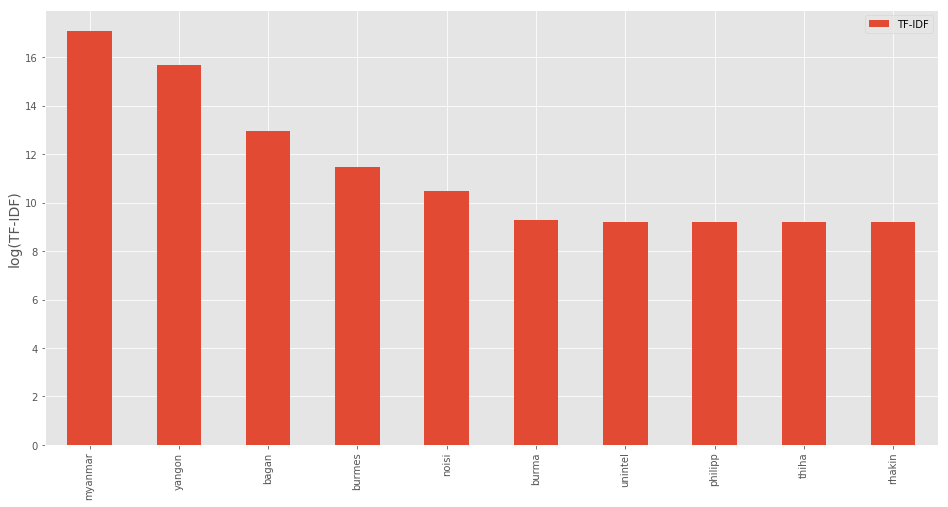

In [178]:
# plot the sample tf-idf results
fig, ax = plt.subplots(1, 1, figsize=(16,8))
test_testidf_DF = test_tfidf_DF.head(n=10)
test_testidf_DF.plot.bar(ax=ax)
plt.ylabel('log(TF-IDF)', size=14)

### Build a sparse feature matrix

In [180]:
# first define a stemmer and tokenizer that removes punctuation

porterStemmer = PorterStemmer()

# get list of lemmatized/stemmed tokens
def stemTokenList(tokens, stemmer):
    return [stemmer.stem(token) for token in tokens]

# get out stemmed tokens from text
def noPunctWordTokenizerStemmer(text, stemmer=porterStemmer):
    # basic tokens to feed to our stem tokenizer
    tokens = nltk.word_tokenize(text.translate(translator))
    # stem
    stemmed_tokens = stemTokenList(tokens, stemmer)
    return stemmed_tokens

In [182]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert a collection of text documents to a matrix of token counts
# we get to pass our custom tokenizer
counter = CountVectorizer(stop_words='english', tokenizer=noPunctWordTokenizerStemmer)
# create the sparse matrix using counter on reviews
features_counts = counter.fit_transform(reviews['subtitle_text'].values)

print("Count matrix of %d reviews with %d feature tokens" % features_counts.shape)
print("The token 'spice' is found at index %d" % counter.vocabulary_.get(u'spice'))

Count matrix of 80 reviews with 13499 feature tokens
The token 'spice' is found at index 11335


Next we use TfidfTransformer to transform our sparse count matrix to a normalizedtf-idf representation:

In [183]:
from sklearn.feature_extraction.text import TfidfTransformer

# create the transformer
# use_id=True tells it to return tf-idf instead of just tf
tfidf = TfidfTransformer(use_idf=True, smooth_idf=True, sublinear_tf=True)
# get the transformation of our counts matrix
features_tfidf = tfidf.fit_transform(features_counts)

print("TF-IDF matrix of %d reviews with %d feature tokens" % features_tfidf.shape)

TF-IDF matrix of 80 reviews with 13499 feature tokens


/Users/jeff/anaconda/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [185]:
counts_names = [counter.get_feature_names()[idx] for idx in features_counts[2,:].indices]
counts_values = features_counts[2,:].data

for i in range(len(counts_values)):
    print(counts_names[i], ':', counts_values[i])

death : 1
child : 1
blow : 1
comfort : 1
danger : 1
doctor : 2
sensit : 1
jungl : 1
insurg : 1
limit : 1
receiv : 1
effect : 1
gentleman : 1
duck : 1
bitter : 1
forest : 1
neung : 1
saam : 1
1 : 2
toy : 1
pick : 1
tenni : 1
blown : 1
maim : 1
number : 1
heavili : 1
bang : 1
hand : 2
dig : 1
detector : 1
mess : 1
task : 1
bombi : 1
cluster : 3
unargu : 1
plantat : 1
step : 1
bombardi : 1
pilot : 1
assum : 1
upset : 1
poor : 1
disconnect : 1
suffer : 2
push : 1
bend : 1
nyang : 4
penh : 4
boh : 4
ownership : 1
hanoi : 1
saigon : 1
typic : 1
fell : 1
jone : 1
indiana : 1
authent : 1
permit : 2
2000 : 1
haven : 1
ben : 1
vacat : 1
afternoon : 1
breez : 1
captur : 1
paddi : 1
unmov : 1
motorbik : 1
hello : 1
kay : 1
600 : 1
medal : 1
gold : 1
pretend : 1
everyon : 1
cheer : 1
ovaltin : 5
normal : 2
bed : 2
floor : 2
sleep : 4
easi : 2
minimum : 2
stem : 1
cilantro : 1
throw : 1
trash : 1
bin : 1
wast : 1
kitchen : 1
surprisingli : 1
impress : 1
thai : 2
scratch : 1
share : 3
migrat : 1
beer

In [189]:
# extract the feature names
feature_names = [counter.get_feature_names()[idx] for idx in features_tfidf[7,:].indices]
# extract the tf-idf values for the features
feature_values = features_tfidf[7,:].data

# sort them descending by score
test_features = sorted(list(zip(feature_names, feature_values)), key=lambda x: -x[1])

for item in test_features:
    print(item)

('trejo', 0.11700189743803788)
('chicano', 0.11009207525568848)
('morrissey', 0.11009207525568848)
('nate', 0.10603637678607096)
('danni', 0.10059715332954978)
('mexican', 0.09561211063131694)
('machet', 0.09268982137204124)
('diaz', 0.08985244172934789)
('mole', 0.08783963984761517)
('mexico', 0.08655709308579662)
('eddi', 0.08648260244375447)
('taco', 0.0854327962585615)
('tlacolula', 0.08216879735283272)
('boyl', 0.0821030926766421)
('latino', 0.08195722614732862)
('pocho', 0.07508212636568057)
('angelino', 0.07226285687102235)
('undocu', 0.07226285687102235)
('bunker', 0.07226285687102235)
('asada', 0.07226285687102235)
('lo', 0.07211238755113365)
('angel', 0.06973601449571488)
('truck', 0.06685675086902114)
('1968', 0.06603052650067956)
('height', 0.06335724231689936)
('cartoon', 0.06160861773148875)
('nick', 0.06160861773148875)
('california', 0.059493219533751175)
('barbacoa', 0.05830121791959448)
('reyna', 0.05830121791959448)
('taquito', 0.05830121791959448)
('quentin', 0.0583

In [190]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_topics=12, learning_method='batch')
lda.fit(features_counts)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_jobs=1, n_topics=12, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

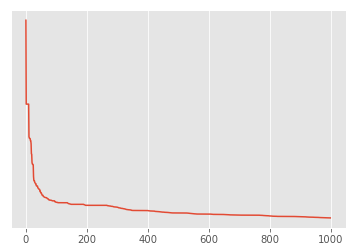

In [191]:
plt.plot(sorted(lda.components_[0], key= lambda x: -x)[0:1000])
plt.yscale('log')

In [192]:
# The Topics-by-Document Matrix
docTopics = lda.transform(features_counts)
print(docTopics.shape)

(80, 12)


In [193]:
# Order and select the top words per topic from a LDA term-by-topic matrix
def topicsToDict(components, names, n_tokens=20):
    topicsDict = {}
    for topic_id, topic in enumerate(components):
        topicsDict[str(topic_id)] = [names[i] for i in topic.argsort()[:-n_tokens-1:-1]]
    return topicsDict

In [196]:
# Print resulting topics top words
topicDict = topicsToDict(lda.components_, feature_names)

for topic in topicDict:
    print()
    print(topic, ':', topicDict[topic])

IndexError: list index out of range

In [ ]:
use this reference!!!
https://nlpforhackers.io/recipe-text-clustering/

In [ ]:
# make wordlist and vocabulary
wordlist = [w for w in nltk.corpus.words.words('en') if w.islower()]
vocab = sorted(set(wordlist))

#### Alternative approach was to download transcripts from CNN; a bit fussier

If decide to attempt later use this source:

```https://github.com/notnews/cnn_transcripts```